In [1]:
## 패키지 불러오기

In [2]:
# 데이터 구성:Series, DataFrame
import pandas as pd
import numpy as np
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# 데이터 scaling
from sklearn.preprocessing import StandardScaler
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 분류 SVM
from sklearn.svm import SVC
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report

## 탄소강(C) 데이터

In [3]:
# 데이터 불러오기
data = pd.read_csv("plate_c.csv")

In [4]:
# 데이터 구조 확인
print(data.head())
print(data.info())
print(data.describe())

  scale steel_kind hsb  fur_avg_temp  fur_total_time rolling_method  \
0    양품          C  적용        1127.5             297       CR(제어압연)   
1    양품          C  적용        1136.0             235       CR(제어압연)   
2    양품          C  적용        1130.0             240       CR(제어압연)   
3    양품          C  적용        1130.0             287       CR(제어압연)   
4    양품          C  적용        1135.5             286       CR(제어압연)   

   rolling_temp  descaling_count work_group  
0           934                8         2조  
1           911                8         2조  
2           935               10         2조  
3           935               10         2조  
4           915               10         2조  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   scale            753 non-null    object 
 1   steel_kind       753 non-null    object 
 2   hsb 

#### 데이터 분리:목표변수/설명변수 분리

In [5]:
# 목표변수/ 설명변수 분리
df_raw_x = data.drop(columns=['scale'])  # Features
df_raw_y = data['scale']  # Target
print(df_raw_x)
print(df_raw_y)

    steel_kind hsb  fur_avg_temp  fur_total_time rolling_method  rolling_temp  \
0            C  적용        1127.5             297       CR(제어압연)           934   
1            C  적용        1136.0             235       CR(제어압연)           911   
2            C  적용        1130.0             240       CR(제어압연)           935   
3            C  적용        1130.0             287       CR(제어압연)           935   
4            C  적용        1135.5             286       CR(제어압연)           915   
..         ...  ..           ...             ...            ...           ...   
748          C  적용        1146.5             203       CR(제어압연)           948   
749          C  적용        1146.5             209       CR(제어압연)           948   
750          C  적용        1166.0             227       CR(제어압연)           948   
751          C  적용        1166.0             204       CR(제어압연)           948   
752          C  적용        1177.5             208       CR(제어압연)           957   

     descaling_count work_g

#### 범주형 설명변수 더미변환

In [6]:
# get_dummies: 범주형 변수에 대한 더미변환 
# 범주형 변수 선택 : select_dtypes="object" 

df_raw_x_char = df_raw_x.select_dtypes(include = "object")
df_raw_x_char.head()

# get_dummies: 범주형 변수에 대한 더미변환 
df_x_dummy = pd.get_dummies(df_raw_x_char)
df_x_dummy.head()

display("Dummy 변환 전:", df_raw_x_char.head())
display("Dummy 변환 후:",df_x_dummy.head())

'Dummy 변환 전:'

,steel_kind,hsb,rolling_method,work_group
0,C,적용,CR(제어압연),2조
1,C,적용,CR(제어압연),2조
2,C,적용,CR(제어압연),2조
3,C,적용,CR(제어압연),2조
4,C,적용,CR(제어압연),2조


'Dummy 변환 후:'

,steel_kind_C,hsb_미적용,hsb_적용,rolling_method_CR(제어압연),work_group_1조,work_group_2조,work_group_3조,work_group_4조
0,True,False,True,True,False,True,False,False
1,True,False,True,True,False,True,False,False
2,True,False,True,True,False,True,False,False
3,True,False,True,True,False,True,False,False
4,True,False,True,True,False,True,False,False


#### 연속형 설명변수 scaling 변환

In [8]:
# 연속형 변수 선택 : select_dtypes="object" 제외
df_raw_x_num = df_raw_x.select_dtypes(exclude = "object")
# df_raw_x_num.head()

# 변수명 저장
v_feature_names = df_raw_x_num.columns

# StandardScaler 적용
scaler = StandardScaler()
df_x_scaled = scaler.fit_transform(df_raw_x_num)
df_x_scaled  = pd.DataFrame(df_x_scaled, columns=v_feature_names)

display("Scale 변환 전:", df_raw_x_num.head())
display("Scale 변환 후:",df_x_scaled.head())

'Scale 변환 전:'

,fur_avg_temp,fur_total_time,rolling_temp,descaling_count
0,1127.5,297,934,8
1,1136.0,235,911,8
2,1130.0,240,935,10
3,1130.0,287,935,10
4,1135.5,286,915,10


'Scale 변환 후:'

,fur_avg_temp,fur_total_time,rolling_temp,descaling_count
0,-2.325197,1.901318,-0.638279,-1.140355
1,-1.733509,0.153117,-1.115582,-1.140355
2,-2.151171,0.294101,-0.617526,0.700347
3,-2.151171,1.619350,-0.617526,0.700347
4,-1.768314,1.591154,-1.032573,0.700347


In [10]:
# 설명변수 데이터 결합: scale된 연속형 + dummy된 범주형
df_x_converted = df_x_scaled.join(df_x_dummy)

display("변환 전:", df_raw_x.head())
display("Scale/Dummy 변환 후:",df_x_converted.head())

'변환 전:'

,steel_kind,hsb,fur_avg_temp,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group
0,C,적용,1127.5,297,CR(제어압연),934,8,2조
1,C,적용,1136.0,235,CR(제어압연),911,8,2조
2,C,적용,1130.0,240,CR(제어압연),935,10,2조
3,C,적용,1130.0,287,CR(제어압연),935,10,2조
4,C,적용,1135.5,286,CR(제어압연),915,10,2조


'Scale/Dummy 변환 후:'

,fur_avg_temp,fur_total_time,rolling_temp,descaling_count,steel_kind_C,hsb_미적용,hsb_적용,rolling_method_CR(제어압연),work_group_1조,work_group_2조,work_group_3조,work_group_4조
0,-2.325197,1.901318,-0.638279,-1.140355,True,False,True,True,False,True,False,False
1,-1.733509,0.153117,-1.115582,-1.140355,True,False,True,True,False,True,False,False
2,-2.151171,0.294101,-0.617526,0.700347,True,False,True,True,False,True,False,False
3,-2.151171,1.619350,-0.617526,0.700347,True,False,True,True,False,True,False,False
4,-1.768314,1.591154,-1.032573,0.700347,True,False,True,True,False,True,False,False


#### 데이터 분할: Train vs Test

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df_x_converted, df_raw_y, test_size=0.3, random_state=1538)

## 모델 생성

#### 기본 옵션 모델 생성

In [13]:
# SVM 모델 학습
svm_model = SVC(kernel='linear', random_state=1538)  # Using linear kernel; you can change to 'rbf' or others
svm_model.fit(X_train, y_train)

# train 모델 정확도
print("Train Accuracy : {:.3f}".format(svm_model.score(X_train, y_train)))
# test 모델 정확도
print("Test Accuracy : {:.3f}".format(svm_model.score(X_test, y_test)))

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
Train Accuracy : 0.844
Test Accuracy : 0.819


In [14]:
# 실행옵션 확인
print(svm_model.get_params().keys())
print(svm_model.get_params().values())

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])
dict_values([1.0, False, 200, None, 0.0, 'ovr', 3, 'scale', 'linear', -1, False, 1538, True, 0.001, False])


#### Cost 미세 변화에 따른 모델 성능

In [15]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# para_c = [10 **c for c in range(-2, 3)] # 0.01, 0.1, 1, 10, 100 : 큰 변화 영향 확인
para_c = [0.1 * c for c in range(1, 13)] # 0.1~1.0 : 작은 변화 영향 확인

for v_C in para_c:
    svm = SVC(C = v_C, random_state = 1538)
    svm.fit(X_train, y_train)
    train_accuracy.append(svm.score(X_train, y_train))
    test_accuracy.append(svm.score(X_test, y_test))

# 데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["Cost"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

In [16]:
# Cost별 정확도
df_accuracy_c.round(3)

,Cost,TrainAccuracy,TestAccuracy
0,0.1,0.799,0.779
1,0.2,0.852,0.832
2,0.3,0.884,0.872
3,0.4,0.899,0.876
4,0.5,0.913,0.872
5,0.6,0.918,0.881
6,0.7,0.917,0.881
7,0.8,0.922,0.881
8,0.9,0.922,0.881
9,1.0,0.920,0.885


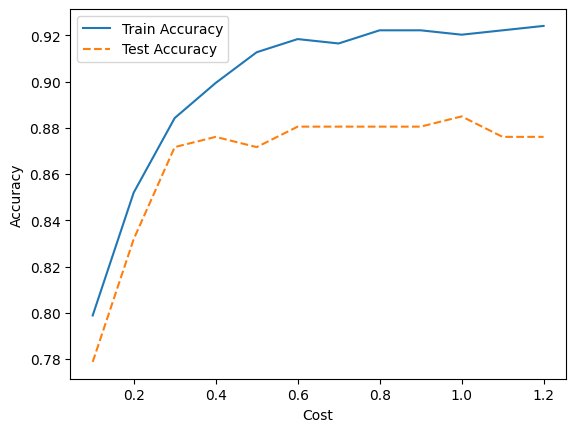

In [17]:
# 정확도 그래프 확인
plt.plot(para_c, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Cost")
plt.legend()

In [ ]:
# Cost 지정: 0.4, 1.0,1.2

#### Gamma(데이터 영향 범위) 변경에 따른 모델 성능

In [30]:
# C= 0.4
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

#para_gamma = [10 **gamma for gamma in range(-2, 3)]   # 0.01, 0.1, 1, 10, 100 : 큰 변화 영향 확인
para_gamma = [0.1 * gamma for gamma in range(1, 11)]     # 0.1~1.0 : 작은 변화 영향 확인

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C=0.4 ,random_state = 1538)
    svm.fit(X_train, y_train)
    train_accuracy.append(svm.score(X_train, y_train))
    test_accuracy.append(svm.score(X_test, y_test))

# 데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

In [31]:
# Gamma별 정확도
df_accuracy_gamma.round(4)

,gamma,TrainAccuracy,TestAccuracy
0,0.1,0.8786,0.8628
1,0.2,0.9089,0.8761
2,0.3,0.9184,0.8894
3,0.4,0.9241,0.8894
4,0.5,0.9298,0.8850
5,0.6,0.9412,0.8850
6,0.7,0.9488,0.8805
7,0.8,0.9507,0.8673
8,0.9,0.9564,0.8628
9,1.0,0.9583,0.8540


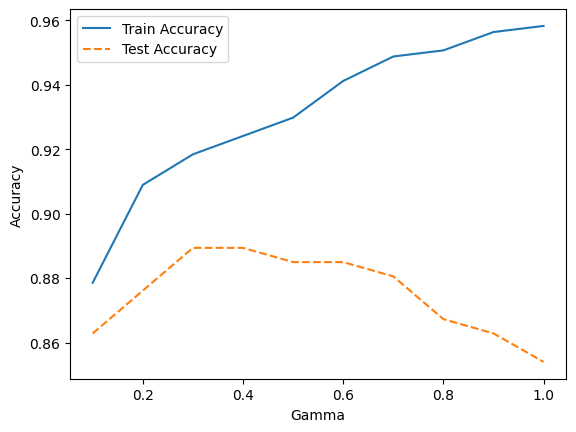

In [32]:
# 모델 정확도 그래프 확인
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Gamma")  # X 축 범위 log 변환
plt.legend()

In [21]:
# Gamma 지정 : 0.5

In [25]:
# C= 1.0
# Gamma 미세 변화에 따른 모델 성능
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# para_gamma = [10 **gamma for gamma in range(-2, 3)]   # 0.01, 0.1, 1, 10, 100 : 큰 변화 영향 확인
para_gamma = [0.1 * gamma for gamma in range(1, 11)]     # 0.1~1.0 : 작은 변화 영향 확인

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C = 1.0, random_state = 1234)
    svm.fit(X_train, y_train)
    train_accuracy.append(svm.score(X_train, y_train))
    test_accuracy.append(svm.score(X_test, y_test))

# 데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

In [33]:
# Gamma별 정확도
df_accuracy_gamma.round(4)

,gamma,TrainAccuracy,TestAccuracy
0,0.1,0.8786,0.8628
1,0.2,0.9089,0.8761
2,0.3,0.9184,0.8894
3,0.4,0.9241,0.8894
4,0.5,0.9298,0.8850
5,0.6,0.9412,0.8850
6,0.7,0.9488,0.8805
7,0.8,0.9507,0.8673
8,0.9,0.9564,0.8628
9,1.0,0.9583,0.8540


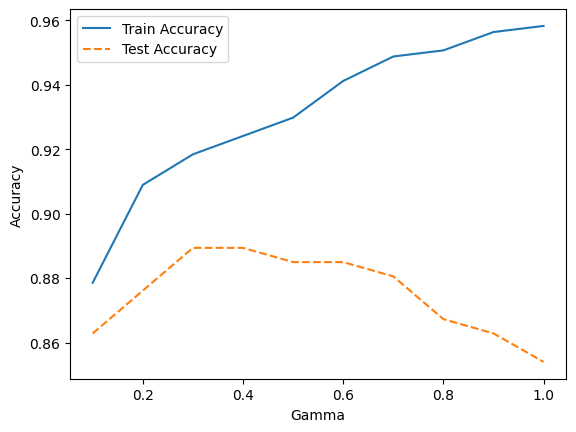

In [34]:
# 모델 정확도 그래프 확인
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Gamma")  # X 축 범위 log 변환
plt.legend()

In [ ]:
# Gamma 지정 : 0.4

In [36]:
# C= 1.2
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

#para_gamma = [10 **gamma for gamma in range(-2, 3)]   # 0.01, 0.1, 1, 10, 100 : 큰 변화 영향 확인
para_gamma = [0.1 * gamma for gamma in range(1, 11)]     # 0.1~1.0 : 작은 변화 영향 확인

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C=1.2 ,random_state = 1538)
    svm.fit(X_train, y_train)
    train_accuracy.append(svm.score(X_train, y_train))
    test_accuracy.append(svm.score(X_test, y_test))

# 데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

In [37]:
# Gamma별 정확도
df_accuracy_gamma.round(4)

,gamma,TrainAccuracy,TestAccuracy
0,0.1,0.9184,0.8805
1,0.2,0.9298,0.8938
2,0.3,0.9374,0.8982
3,0.4,0.9620,0.9071
4,0.5,0.9696,0.9115
5,0.6,0.9734,0.9071
6,0.7,0.9734,0.8982
7,0.8,0.9772,0.8982
8,0.9,0.9810,0.8894
9,1.0,0.9848,0.8894


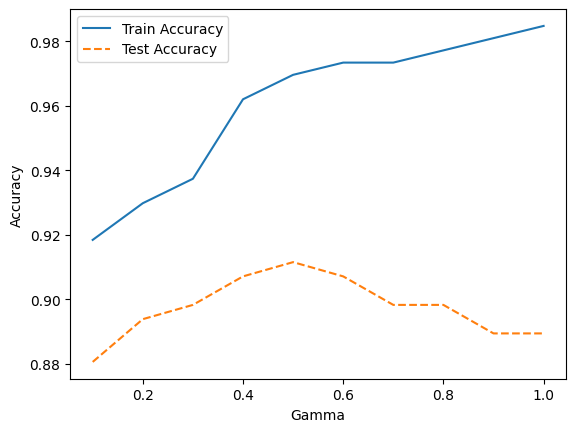

In [38]:
# 모델 정확도 그래프 확인
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Gamma")  # X 축 범위 log 변환
plt.legend()

In [39]:
# Gamma 지정 : 0.5

## 결론 도출

In [41]:
# 최종 모델
svc_final = SVC(gamma = 0.5, C=0.4, random_state=1538)
svc_final.fit(X_train, y_train)

# 평가
y_pred_train = svc_final.predict(X_train)
y_pred_test = svc_final.predict(X_test)

# train 모델 정확도
print("Train Accucary : {:.3f}".format(svc_final.score(X_train, y_train)))
# test 모델 정확도
print("Test Accuracy : {:.3f}\n".format(svc_final.score(X_test, y_test)))

# confusion matrix
print("Test Confusion matrix: \n{}".format(confusion_matrix(y_test, y_pred_test)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(y_test, y_pred_test, digits=3))

Train Accucary : 0.930
Test Accuracy : 0.885

Test Confusion matrix: 
[[ 69  17]
 [  9 131]]
              precision    recall  f1-score   support

          불량      0.885     0.802     0.841        86
          양품      0.885     0.936     0.910       140

    accuracy                          0.885       226
   macro avg      0.885     0.869     0.876       226
weighted avg      0.885     0.885     0.884       226



In [42]:
# 최종 모델
svc_final = SVC(gamma = 0.4, C=1.0, random_state=1538)
svc_final.fit(X_train, y_train)

# 평가
y_pred_train = svc_final.predict(X_train)
y_pred_test = svc_final.predict(X_test)

# train 모델 정확도
print("Train Accucary : {:.3f}".format(svc_final.score(X_train, y_train)))
# test 모델 정확도
print("Test Accuracy : {:.3f}\n".format(svc_final.score(X_test, y_test)))

# confusion matrix
print("Test Confusion matrix: \n{}".format(confusion_matrix(y_test, y_pred_test)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(y_test, y_pred_test, digits=3))

Train Accucary : 0.951
Test Accuracy : 0.903

Test Confusion matrix: 
[[ 73  13]
 [  9 131]]
              precision    recall  f1-score   support

          불량      0.890     0.849     0.869        86
          양품      0.910     0.936     0.923       140

    accuracy                          0.903       226
   macro avg      0.900     0.892     0.896       226
weighted avg      0.902     0.903     0.902       226



In [43]:
# 최종 모델
svc_final = SVC(gamma = 0.5, C= 1.2, random_state=1538)
svc_final.fit(X_train, y_train)

# 평가
y_pred_train = svc_final.predict(X_train)
y_pred_test = svc_final.predict(X_test)

# train 모델 정확도
print("Train Accucary : {:.3f}".format(svc_final.score(X_train, y_train)))
# test 모델 정확도
print("Test Accuracy : {:.3f}\n".format(svc_final.score(X_test, y_test)))

# confusion matrix
print("Test Confusion matrix: \n{}".format(confusion_matrix(y_test, y_pred_test)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(y_test, y_pred_test, digits=3))

Train Accucary : 0.970
Test Accuracy : 0.912

Test Confusion matrix: 
[[ 74  12]
 [  8 132]]
              precision    recall  f1-score   support

          불량      0.902     0.860     0.881        86
          양품      0.917     0.943     0.930       140

    accuracy                          0.912       226
   macro avg      0.910     0.902     0.905       226
weighted avg      0.911     0.912     0.911       226



## 티타늄(Ti) 데이터

In [5]:
# 데이터 불러오기
data = pd.read_csv("plate_t.csv")

In [6]:
# 데이터 구조확인
print(data.head())
print(data.info())
print(data.describe())

  scale steel_kind hsb  fur_avg_temp  fur_total_time rolling_method  \
0    양품          T  적용        1138.5             259     TMCP(온도제어)   
1    양품          T  적용        1139.5             238     TMCP(온도제어)   
2    양품          T  적용        1125.0             258     TMCP(온도제어)   
3    양품          T  적용        1139.5             266     TMCP(온도제어)   
4    양품          T  적용        1134.0             246     TMCP(온도제어)   

   rolling_temp  descaling_count work_group  
0           934                8         1조  
1           937                8         1조  
2           889                8         1조  
3           885                8         1조  
4           873                8         1조  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   scale            241 non-null    object 
 1   steel_kind       241 non-null    object 
 2   hsb 

#### 데이터 분리:목표변수/설명변수 분리

In [8]:
# 목표변수/ 설명변수 분리
df_raw_x = data.drop(columns=['scale'])  # Features
df_raw_y = data['scale']  # Target
print(df_raw_x)
print(df_raw_y)

    steel_kind  hsb  fur_avg_temp  fur_total_time rolling_method  \
0            T   적용        1138.5             259     TMCP(온도제어)   
1            T   적용        1139.5             238     TMCP(온도제어)   
2            T   적용        1125.0             258     TMCP(온도제어)   
3            T   적용        1139.5             266     TMCP(온도제어)   
4            T   적용        1134.0             246     TMCP(온도제어)   
..         ...  ...           ...             ...            ...   
236          T   적용        1112.5             300     TMCP(온도제어)   
237          T   적용        1133.5             337       CR(제어압연)   
238          T   적용        1125.5             326       CR(제어압연)   
239          T  미적용        1129.0             217       CR(제어압연)   
240          T   적용        1122.5             258       CR(제어압연)   

     rolling_temp  descaling_count work_group  
0             934                8         1조  
1             937                8         1조  
2             889                8     

#### 범주형 설명변수 더미변환

In [9]:
# get_dummies: 범주형 변수에 대한 더미변환 
# 범주형 변수 선택 : select_dtypes="object" 

df_raw_x_char = df_raw_x.select_dtypes(include = "object")
df_raw_x_char.head()

# get_dummies: 범주형 변수에 대한 더미변환 
df_x_dummy = pd.get_dummies(df_raw_x_char)
df_x_dummy.head()

display("Dummy 변환 전:", df_raw_x_char.head())
display("Dummy 변환 후:",df_x_dummy.head())

'Dummy 변환 전:'

,steel_kind,hsb,rolling_method,work_group
0,T,적용,TMCP(온도제어),1조
1,T,적용,TMCP(온도제어),1조
2,T,적용,TMCP(온도제어),1조
3,T,적용,TMCP(온도제어),1조
4,T,적용,TMCP(온도제어),1조


'Dummy 변환 후:'

,steel_kind_T,hsb_미적용,hsb_적용,rolling_method_CR(제어압연),rolling_method_TMCP(온도제어),work_group_1조,work_group_2조,work_group_3조
0,True,False,True,False,True,True,False,False
1,True,False,True,False,True,True,False,False
2,True,False,True,False,True,True,False,False
3,True,False,True,False,True,True,False,False
4,True,False,True,False,True,True,False,False


#### 연속형 설명변수 scaling 변환

In [11]:
# 연속형 변수 선택 : select_dtypes="object" 제외
df_raw_x_num = df_raw_x.select_dtypes(exclude = "object")
# df_raw_x_num.head()

# 변수명 저장
v_feature_names = df_raw_x_num.columns

# StandardScaler 적용
scaler = StandardScaler()
df_x_scaled = scaler.fit_transform(df_raw_x_num)
df_x_scaled  = pd.DataFrame(df_x_scaled, columns=v_feature_names)

display("Scale 변환 전:", df_raw_x_num.head())
display("Scale 변환 후:",df_x_scaled.head())

'Scale 변환 전:'

,fur_avg_temp,fur_total_time,rolling_temp,descaling_count
0,1138.5,259,934,8
1,1139.5,238,937,8
2,1125.0,258,889,8
3,1139.5,266,885,8
4,1134.0,246,873,8


'Scale 변환 후:'

,fur_avg_temp,fur_total_time,rolling_temp,descaling_count
0,0.453808,-0.250845,1.643885,1.553944
1,0.538885,-0.903558,1.714133,1.553944
2,-0.694744,-0.281927,0.590162,1.553944
3,0.538885,-0.033274,0.496498,1.553944
4,0.070957,-0.654906,0.215505,1.553944


In [13]:
# 설명변수 데이터 결합: scale된 연속형 + dummy된 범주형
df_x_converted = df_x_scaled.join(df_x_dummy)

display("변환 전:", df_raw_x.head())
display("Scale/Dummy 변환 후:",df_x_converted.head())

'변환 전:'

,steel_kind,hsb,fur_avg_temp,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group
0,T,적용,1138.5,259,TMCP(온도제어),934,8,1조
1,T,적용,1139.5,238,TMCP(온도제어),937,8,1조
2,T,적용,1125.0,258,TMCP(온도제어),889,8,1조
3,T,적용,1139.5,266,TMCP(온도제어),885,8,1조
4,T,적용,1134.0,246,TMCP(온도제어),873,8,1조


'Scale/Dummy 변환 후:'

,fur_avg_temp,fur_total_time,rolling_temp,descaling_count,steel_kind_T,hsb_미적용,hsb_적용,rolling_method_CR(제어압연),rolling_method_TMCP(온도제어),work_group_1조,work_group_2조,work_group_3조
0,0.453808,-0.250845,1.643885,1.553944,True,False,True,False,True,True,False,False
1,0.538885,-0.903558,1.714133,1.553944,True,False,True,False,True,True,False,False
2,-0.694744,-0.281927,0.590162,1.553944,True,False,True,False,True,True,False,False
3,0.538885,-0.033274,0.496498,1.553944,True,False,True,False,True,True,False,False
4,0.070957,-0.654906,0.215505,1.553944,True,False,True,False,True,True,False,False


#### 데이터 분할: Train vs Test

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df_x_converted, df_raw_y, test_size=0.3, random_state=1538)

## 모델 생성

#### 기본 옵션 모델 생성

In [16]:
# SVM 모델 학습
svm_model = SVC(kernel='linear', random_state=1538)  # Using linear kernel; you can change to 'rbf' or others
svm_model.fit(X_train, y_train)

# train 모델 정확도
print("Train Accuracy : {:.3f}".format(svm_model.score(X_train, y_train)))
# test 모델 정확도
print("Test Accuracy : {:.3f}".format(svm_model.score(X_test, y_test)))

Train Accuracy : 0.964
Test Accuracy : 0.945


In [17]:
# 실행옵션 확인
print(svm_model.get_params().keys())
print(svm_model.get_params().values())

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])
dict_values([1.0, False, 200, None, 0.0, 'ovr', 3, 'scale', 'linear', -1, False, 1538, True, 0.001, False])


#### Cost 미세 변화에 따른 모델 성능

In [19]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# para_c = [10 **c for c in range(-2, 3)] # 0.01, 0.1, 1, 10, 100 : 큰 변화 영향 확인
para_c = [0.1 * c for c in range(1, 13)] # 0.1~1.0 : 작은 변화 영향 확인

for v_C in para_c:
    svm = SVC(C = v_C, random_state = 1538)
    svm.fit(X_train, y_train)
    train_accuracy.append(svm.score(X_train, y_train))
    test_accuracy.append(svm.score(X_test, y_test))

# 데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["Cost"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

In [20]:
# Cost별 정확도
df_accuracy_c.round(3)

,Cost,TrainAccuracy,TestAccuracy
0,0.1,0.917,0.918
1,0.2,0.917,0.918
2,0.3,0.917,0.918
3,0.4,0.917,0.918
4,0.5,0.923,0.918
5,0.6,0.946,0.918
6,0.7,0.964,0.932
7,0.8,0.970,0.932
8,0.9,0.970,0.932
9,1.0,0.970,0.932


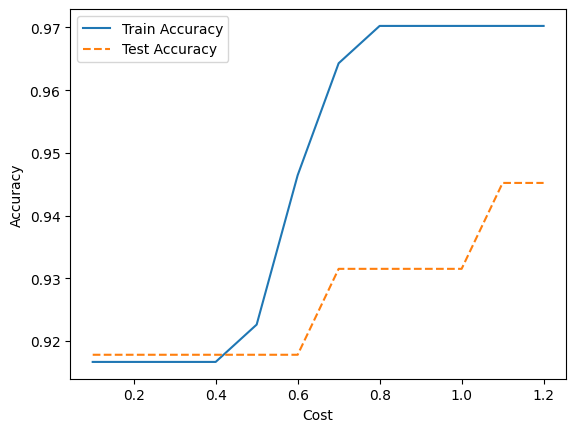

In [21]:
# 정확도 그래프 확인
plt.plot(para_c, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Cost")
plt.legend()

In [ ]:
# Cost 지정: 0.2, 0.7

#### Gamma(데이터 영향 범위) 변경에 따른 모델 성능

In [29]:
# C= 0.2
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_gamma = [10 **gamma for gamma in range(-2, 3)]   # 0.01, 0.1, 1, 10, 100 : 큰 변화 영향 확인
# para_gamma = [0.1 * gamma for gamma in range(1, 11)]     # 0.1~1.0 : 작은 변화 영향 확인

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C=0.2 ,random_state = 1538)
    svm.fit(X_train, y_train)
    train_accuracy.append(svm.score(X_train, y_train))
    test_accuracy.append(svm.score(X_test, y_test))

# 데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

In [30]:
# Gamma별 정확도
df_accuracy_gamma.round(4)

,gamma,TrainAccuracy,TestAccuracy
0,0.01,0.9167,0.9178
1,0.10,0.9167,0.9178
2,1.00,0.9167,0.9178
3,10.00,0.9167,0.9178
4,100.00,0.9167,0.9178


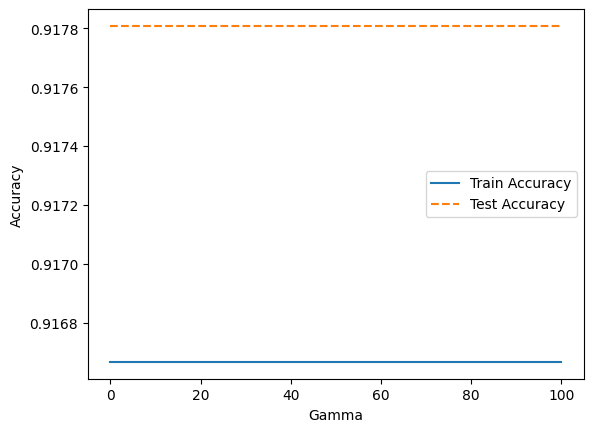

In [31]:
# 모델 정확도 그래프 확인
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Gamma")  # X 축 범위 log 변환
plt.legend()

In [32]:
# C= 0.7
# Gamma 미세 변화에 따른 모델 성능
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# para_gamma = [10 **gamma for gamma in range(-2, 3)]   # 0.01, 0.1, 1, 10, 100 : 큰 변화 영향 확인
para_gamma = [0.1 * gamma for gamma in range(1, 11)]     # 0.1~1.0 : 작은 변화 영향 확인

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C = 0.7, random_state = 1234)
    svm.fit(X_train, y_train)
    train_accuracy.append(svm.score(X_train, y_train))
    test_accuracy.append(svm.score(X_test, y_test))

# 데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

In [33]:
# Gamma별 정확도
df_accuracy_gamma.round(4)

,gamma,TrainAccuracy,TestAccuracy
0,0.1,0.9524,0.9178
1,0.2,0.9702,0.9315
2,0.3,0.9643,0.9315
3,0.4,0.9583,0.9178
4,0.5,0.9524,0.9178
5,0.6,0.9464,0.9178
6,0.7,0.9405,0.9178
7,0.8,0.9405,0.9178
8,0.9,0.9405,0.9178
9,1.0,0.9345,0.9178


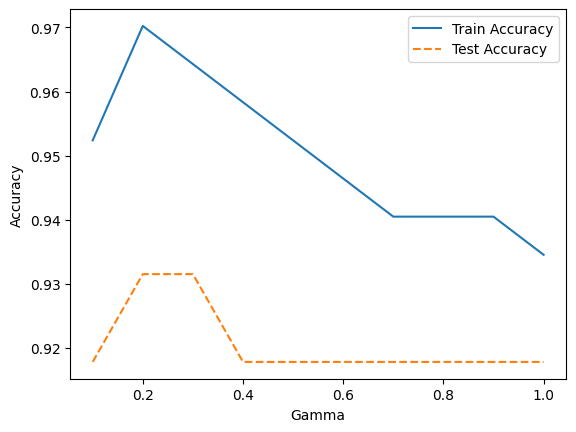

In [34]:
# 모델 정확도 그래프 확인
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Gamma")  # X 축 범위 log 변환
plt.legend()

In [ ]:
# Gamma 지정 : 0.2

## 결론 도출

In [35]:
# 최종 모델
svc_final = SVC(gamma = 0.2, C=0.7, random_state=1538)
svc_final.fit(X_train, y_train)

# 평가
y_pred_train = svc_final.predict(X_train)
y_pred_test = svc_final.predict(X_test)

# train 모델 정확도
print("Train Accucary : {:.3f}".format(svc_final.score(X_train, y_train)))
# test 모델 정확도
print("Test Accuracy : {:.3f}\n".format(svc_final.score(X_test, y_test)))

# confusion matrix
print("Test Confusion matrix: \n{}".format(confusion_matrix(y_test, y_pred_test)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(y_test, y_pred_test, digits=3))

Train Accucary : 0.970
Test Accuracy : 0.932

Test Confusion matrix: 
[[ 1  5]
 [ 0 67]]
              precision    recall  f1-score   support

          불량      1.000     0.167     0.286         6
          양품      0.931     1.000     0.964        67

    accuracy                          0.932        73
   macro avg      0.965     0.583     0.625        73
weighted avg      0.936     0.932     0.908        73



## Grid Search

In [ ]:
estimator = SVC(random_state=1234)
# 구하고자 하는 parameter와 범위
param_grid = {"C": para_c,
              "gamma": para_gamma}
# 정확도가 높은 최적 parameter 찾기
grid_rf = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1)
grid_rf.fit(df_scaled_train_x, df_train_y)
print("best estimator model: \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter: \n{}".format(grid_rf.best_params_))
print("\nbest score: \n{}".format(grid_rf.best_score_.round(3)))